<a href="https://colab.research.google.com/github/Chrisxu-99/RetrospectiveAnalysis/blob/main/RetrospectiveAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Project 1 - Retrospective Analysis

## Industry Identification
  In an era with drastic development in the digital content creation industry, more and more individuals turn their gear towards this market. In this analysis, we take the position as a consulting team for individual or group influencers to help them determine what factors besides the content itself contribute to some of the most trending videos on YouTube. 
## Problem Statement
  Our goal is to provide suggestions that help them get more likes and views on their publised YouTube videos. We will determine which factors influencers should focus on and how each factor affects the popularity of the video.
## Lean Canvas
<img src="LeanCanvas.png" width="900" height="700">

# Data Import
In this part, we import our data from GitHub and use df.head() to visually speculate the structure of the dataset. Then, we use df.info() to examine data types for columns and see if there are missing values that we need to deal with. Luckily, we don't find any missing values, so we can continue our analysis.

In [1]:
# Key imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We import the dataset and display the first five rows to visually examine it
df = pd.read_csv("https://github.com/Chrisxu-99/RetrospectiveAnalysis/blob/main/USvideos.csv?raw=true")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# Gain a basic understanding of the dataset and see if there are missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# Numerical Value Analysis
In this section, we pick four numerical variables, views, likes, dislikes, and comment_count, to analyze. We want to see how these four variables correlate with each other. Also, we want to analyze those numerical values by furthur dividing into different categories. This will come in the categorical analysis. 

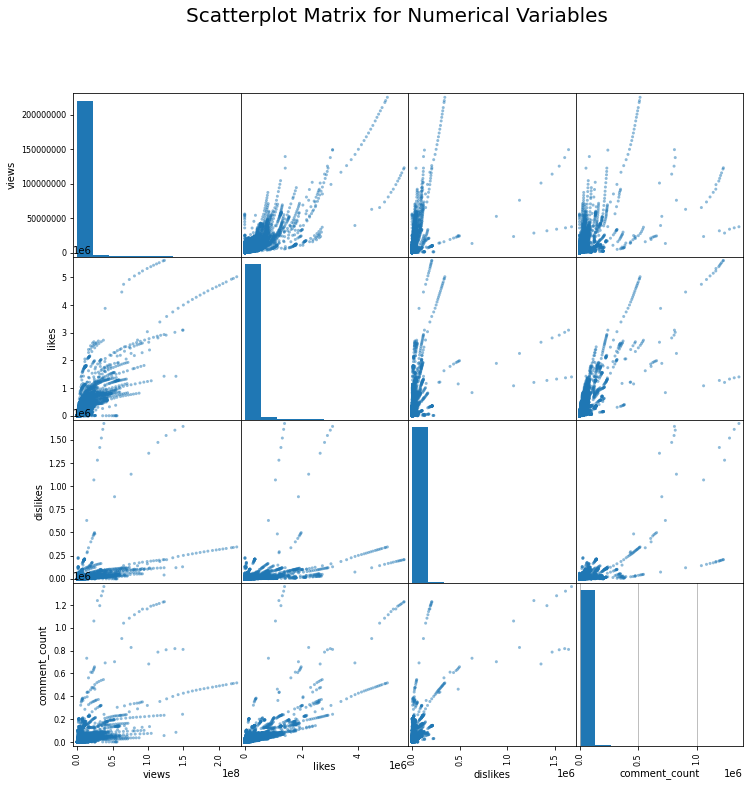

In [4]:
# Visualize each numerical factor and have a quick look at their distributions and correlations
pd.plotting.scatter_matrix(df[['views','likes','dislikes','comment_count']],figsize=(12,12))
plt.suptitle('Scatterplot Matrix for Numerical Variables', fontsize=20)
plt.grid()
plt.show()

In [5]:
# We saw log distribution in from the previous scatterplot matrix so we create new columns for each numerical variable
df['log_likes'] = np.log(df['likes']+1)
df['log_views'] = np.log(df['views']+1)
df['log_comment_count'] = np.log(df['comment_count']+1)
df['log_dislikes'] = np.log(df['dislikes']+1)

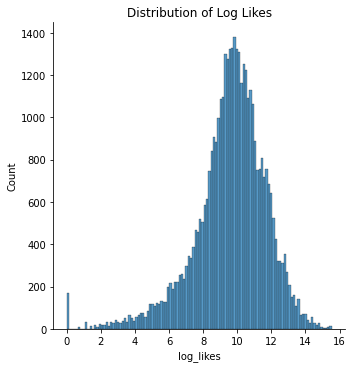

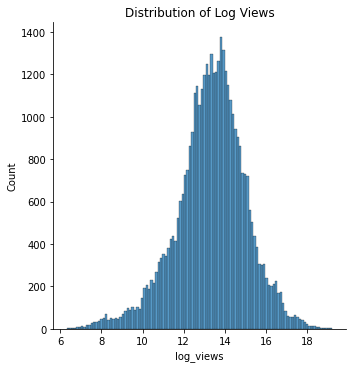

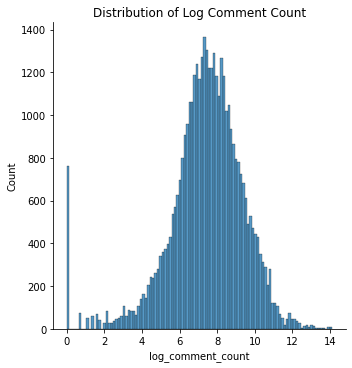

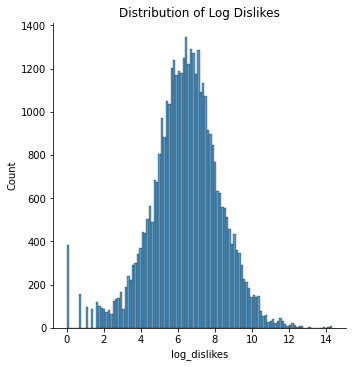

In [6]:
# We review the distribution of log adjusted variables
sns.displot(df['log_likes'])
plt.title('Distribution of Log Likes')
sns.displot(df['log_views'])
plt.title('Distribution of Log Views')
sns.displot(df['log_comment_count'])
plt.title('Distribution of Log Comment Count')
sns.displot(df['log_dislikes'])
plt.title('Distribution of Log Dislikes')
plt.show()

# Categorical Analysis
In this section, we will analyze categorical variables by focusing on how each variable is correlated with the number of views. As we concluded from the previous section, views are positively correlated with likes and number of comments. Therefore, as long as the video attracts more views, it will have more likes and comments. 

In [7]:
# Create a new column that displays category names instead of category id to increase readability
df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

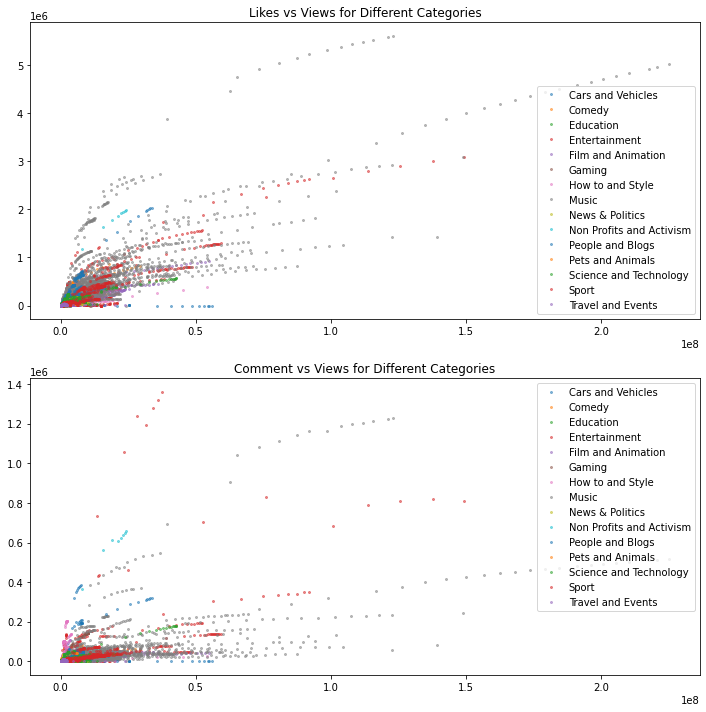

In [8]:
# Group the DataFrame by category names for further category-oriented analysis
grouped_by_category = df.groupby('category_name')

# Relationship between likes, views, and number of comments by category
fig, ax = plt.subplots(2,1,figsize=(12,12))
ax[0].margins(0.05) # Optional, just adds 5% padding to the autoscaling
ax[1].margins(0.05)
for name, group in grouped_by_category:
    ax[0].plot(group.views, group.likes, marker='o', alpha=0.5, linestyle='', ms=2, label=name)
    ax[1].plot(group.views, group.comment_count, marker='o', alpha=0.5,linestyle='',ms=2, label=name)
ax[0].legend()
ax[1].legend()
ax[0].set_title('Likes vs Views for Different Categories')
ax[1].set_title('Comment vs Views for Different Categories')
plt.show()

Text(0, 0.5, 'Log_Views')

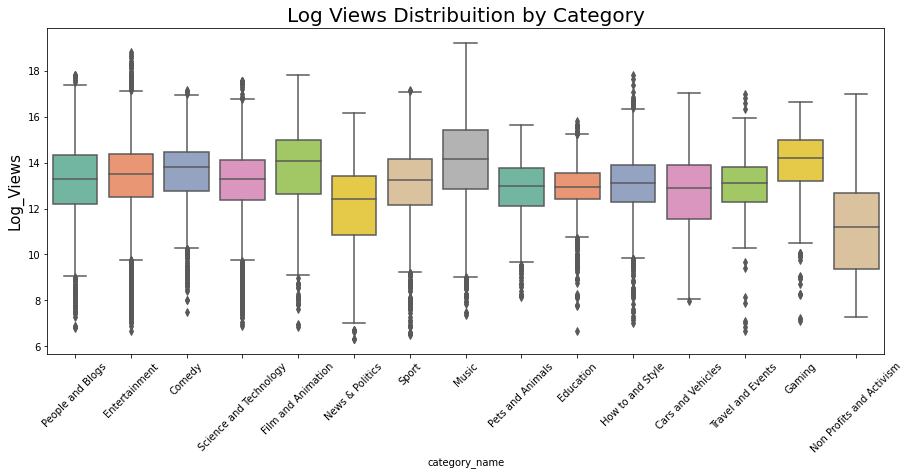

In [9]:
# See which categories have higher average views
fig, g1 = plt.subplots(1,1,figsize=(15,6))
g1 = sns.boxplot(x='category_name', y='log_views', data=df, palette="Set2")
g1.set_xticklabels(labels=g1.get_xticklabels(), rotation=45)
g1.set_title("Log Views Distribuition by Category", fontsize=20)
g1.set_ylabel("Log_Views", fontsize=15)

In [10]:
df['channel_title'].value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
                                         ... 
Hin Nya                                     1
PK Inventor                                 1
Commercials Funny                           1
shoaib246                                   1
JanPaul123                                  1
Name: channel_title, Length: 2207, dtype: int64

In [11]:
data_channel_title = df['channel_title'].value_counts().head(10)
data_channel_title
# Finding the 10 most used channels

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64

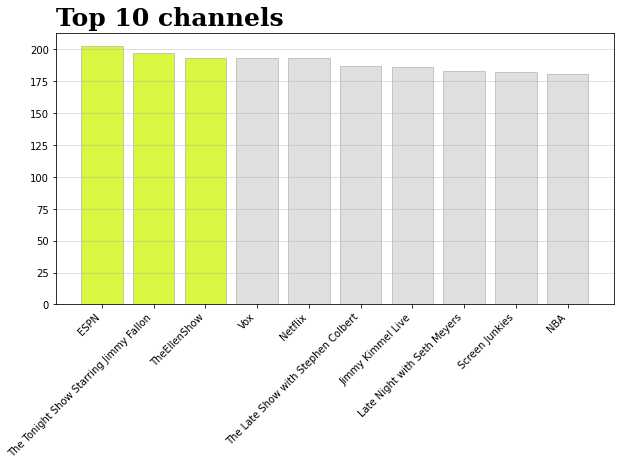

In [12]:
colour_map = ['#dfdfdf' for i in range(len(data_channel_title))]
colour_map[0] = '#d9f640'
colour_map[1] = '#d9f640'
colour_map[2] = '#d9f640'
fig, ax = plt.subplots(1, 1, figsize = (10,5))

ax.bar(data_channel_title.index, data_channel_title, color = colour_map, edgecolor = 'darkgrey', linewidth = 0.6)
ax.grid(axis = 'y', alpha = 0.5)
plt.xticks(rotation = 45, ha="right")

fig.text(0.125, 0.9, 'Top 10 channels', fontfamily = 'serif', size = 25, fontweight = 'bold')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


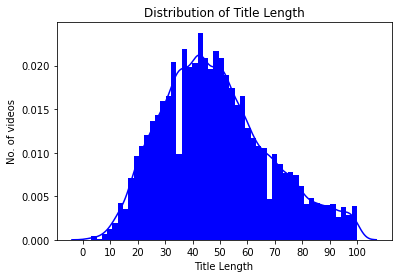

In [13]:
df["title_length"] = df["title"].apply(lambda x: len(x))
fig, ax = plt.subplots()
title_len = sns.distplot(df["title_length"], kde=True, rug=False, hist_kws={'alpha': 1}, color='Blue',ax=ax)
title_len = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))
plt.title('Distribution of Title Length')
plt.show()

Text(0.5, 1.0, 'Title Length vs. Number of Views')

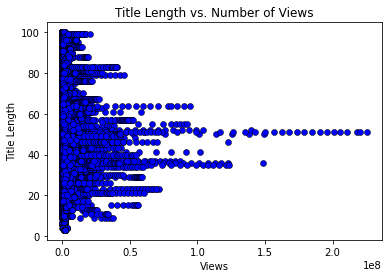

In [14]:
# Plot the title lengths against the number of views 
fig, ax = plt.subplots()
number_views= ax.scatter(x=df['views'], y=df['title_length'],color='Blue', edgecolors="#000000", linewidths=0.5)
number_views = ax.set(xlabel="Views", ylabel="Title Length")
plt.title('Title Length vs. Number of Views')

In [15]:
from collections import OrderedDict, Counter

In [16]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in df['title']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


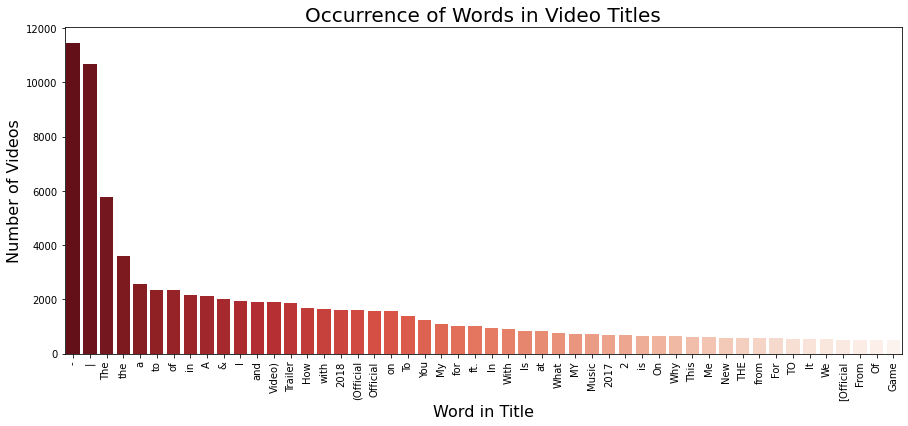

In [17]:
# Graphing occurrence of words in title
fig= plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(top_words, freqs, palette="Reds_r")
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Occurrence of Words in Video Titles', fontsize=20)
plt.show()

# Discussion
The first key takeaways from the above analyis is that both likes and number of comments are positively correlated with the number of views. Therefore, the focus of creating trending videos should be on attracting more likes. 

The second main argument is that different categories have different abilities in converting views to likes and comments. Music and films have a higher converting rate in terms of number of likes, while entertainment has a higher converting rate of comments. A higher converting rate means a small amount of efforts can yield higher profit as the revenue is related with all of those factors. On top of that, we see music, filming, and gaming are leading the average number of views. 

After jumping into categorical variables, we can see that the title length of the video also plays a significant factor in determining the number of views received by a video. A title length from 30 to 50 characters take the most weight among all title lengths and this range also generates highest views for videos. 

# Conclusion and Recommendation
In conclusion, we would recommend influencers to post videos based on the following principles:
* Choose the category that the influencer is most familiar with. It's better if the influencer is able to produce music or filming related videos. However, considering the small disparity among different categories, the influencer does not necessarily need to strictly follow this. Producing more attractive content using the influencer's expertise will be more beneficial. 
* Try to focus on attracting more views, instead of focusing all aspects including likes and comments. Having a more focused strategy helps to lower the budget and to generate more specialized and targeted marketing strategies.
* The title plays an important role in attracting views, so the influencer should make the title length within the range of 30-50. 